# Regression is my profession

link to data - https://www.kaggle.com/gauthamp10/google-playstore-apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/Google-Playstore.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
App Name             1118135 non-null object
App Id               1118136 non-null object
Category             1118133 non-null object
Rating               1111286 non-null float64
Rating Count         1111286 non-null float64
Installs             1117975 non-null object
Minimum Installs     1117975 non-null float64
Maximum Installs     1118136 non-null int64
Free                 1118136 non-null bool
Price                1118136 non-null float64
Currency             1117975 non-null object
Size                 1118136 non-null object
Minimum Android      1116123 non-null object
Developer Id         1118134 non-null object
Developer Website    703770 non-null object
Developer Email      1118114 non-null object
Released             1110406 non-null object
Last Updated         1118136 non-null object
Content Rating       1118136 non-null object
Privacy Policy       964612 non-

In [5]:
data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [6]:
data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

# EDA

In [219]:
to_drop = [
    'App Name',
    'App Id',
    # 'Category', # went to dummies
    'Rating Count',
    'Maximum Installs',
    #'Installs', # went to dummies
    'Minimum Installs',
    'Currency',
    'Size',
    #'Minimum Android',
    'Developer Id',
    'Developer Website',
    'Developer Email',
    'Released',
    'Last Updated',
    # 'Content Rating', # went to dummies
    'Privacy Policy',
    'size_unit'
    
]

## Target variable: Rating

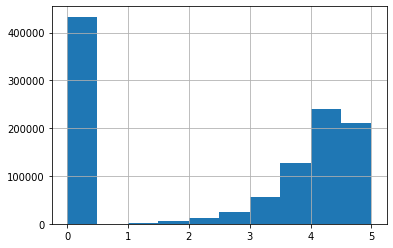

In [8]:
data['Rating'].hist()

In [9]:
sum(data['Rating']==0)

433265

In [10]:
data = data[data['Rating']>0]

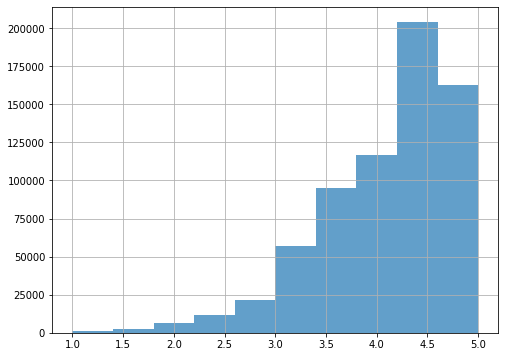

In [13]:
plt.figure(figsize=(8, 6))
data['Rating'].hist(alpha=0.7)
plt.show()

## App Name

In [17]:
data['App Name'].value_counts()

Solitaire                                          102
Flashlight                                          94
Gallery                                             83
Sudoku                                              76
Tic Tac Toe                                         74
                                                  ... 
New Stickers & Meme maker - WAStickerApps            1
Православные обои                                    1
SecretBase - hidden private chat app messages 💬      1
Fiche de paie                                        1
BrewDog USA                                          1
Name: App Name, Length: 641539, dtype: int64

In [23]:
data['app_name_length'] = data['App Name'].apply(lambda x: len(str(x)))

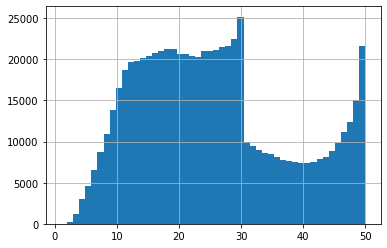

In [27]:
data['app_name_length'].hist(bins=50)

## App Id

In [30]:
data['App Id'].value_counts()

net.recetasdemiabuela.frasesparaenamorar    1
com.globo.muuandroidv1                      1
com.gay.livevideo.chat.dating.gaytm         1
com.yvelat.yvelatwpskapp                    1
com.maxsalazar.radiometal1                  1
                                           ..
com.riolab.cookbook                         1
com.tss21.gkbd.skin.google.christmasred     1
com.enozom.arabarts                         1
com.kappsmart.booleanexpressionminimizer    1
com.AFGamesStudio.LineRunner3D              1
Name: App Id, Length: 678021, dtype: int64

## Category

In [37]:
len(data['Category'].unique())

49

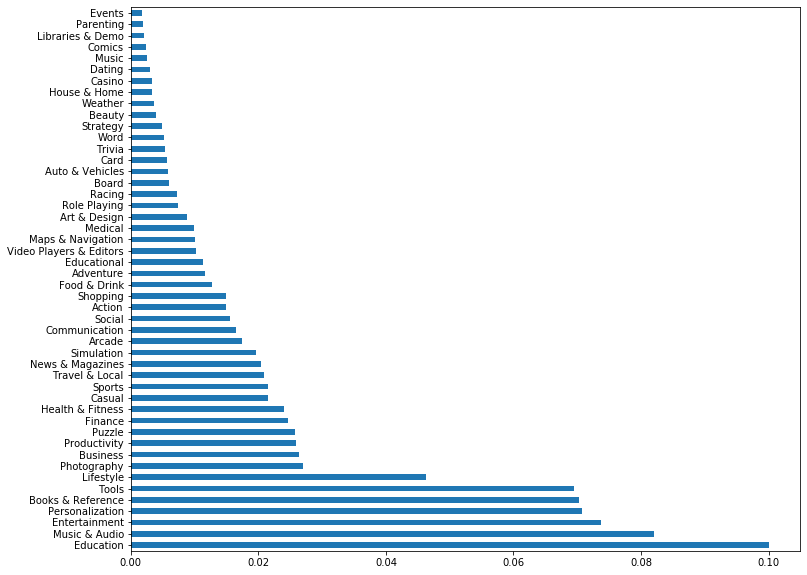

In [36]:
data['Category'].value_counts(normalize=True).plot.barh(figsize=(12, 10));

In [39]:
data = pd.get_dummies(data, columns=['Category'], prefix='category')

## 'Rating Count'

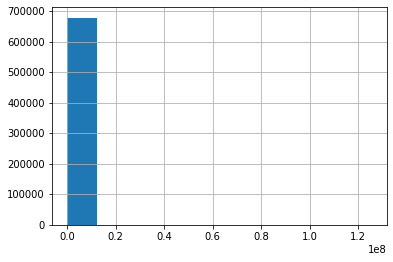

In [41]:
data['Rating Count'].hist()

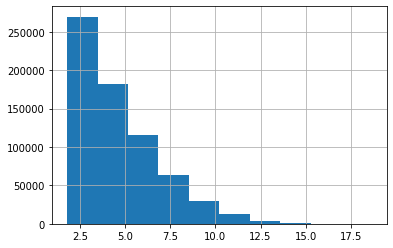

In [42]:
np.log(data['Rating Count']+1).hist()

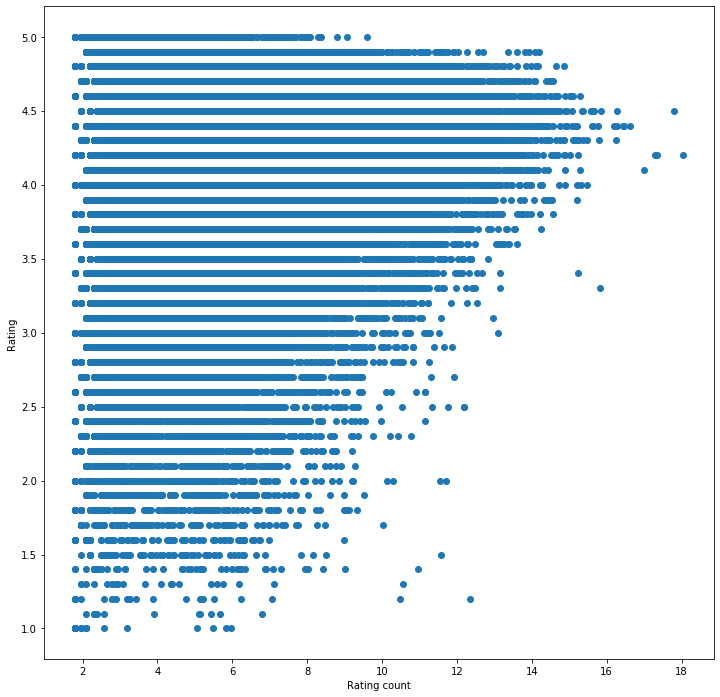

In [45]:
plt.figure(figsize=(12, 12))
plt.scatter(np.log(data['Rating Count']+1).head(100000), data['Rating'].head(100000))
plt.xlabel("Rating count")
plt.ylabel("Rating")
plt.show()

In [47]:
sum(data['Rating Count']<50)

323824

In [49]:
data['log_rating_count'] = np.log(data['Rating Count']+1)

## Maximum Installs

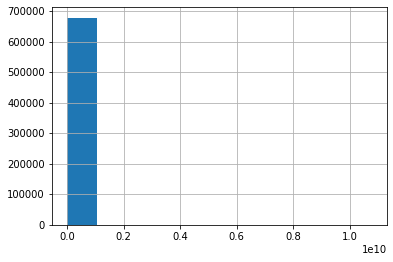

In [58]:
data['Maximum Installs'].hist()

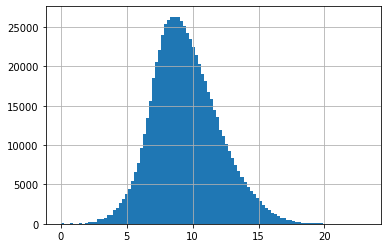

In [62]:
np.log(data['Maximum Installs']+1).hist(bins=100)

In [66]:
np.exp(np.quantile(np.log(data['Maximum Installs']+1), q=0.01))

62.99999999999999

In [67]:
data = data[data['Maximum Installs']>=100]

In [69]:
data['log_installs'] = np.log(data['Maximum Installs']+1)

## Installs

In [70]:
data['Installs'].value_counts()

1,000+             161042
10,000+            157175
100,000+            80101
5,000+              78526
50,000+             51368
100+                39489
500+                39489
1,000,000+          27008
500,000+            20674
5,000,000+           5497
10,000,000+          5166
50,000,000+           695
100,000,000+          423
500,000,000+           54
1,000,000,000+         47
5,000,000,000+         12
10,000,000,000+         1
Name: Installs, dtype: int64

In [71]:
data = pd.get_dummies(data, columns=['Installs'], prefix='installs_category')

## 'Free'

In [74]:
data['Free'].value_counts(normalize=True)

True     0.966083
False    0.033917
Name: Free, dtype: float64

## 'Price'

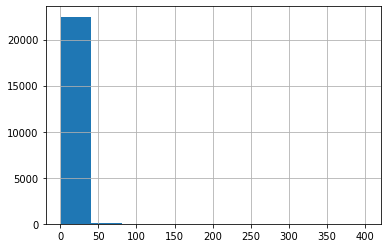

In [82]:
data['Price'][data['Free']==False].hist()

## Currency

In [86]:
data['Currency'].value_counts(normalize=True)

USD    0.988252
XXX    0.011361
EUR    0.000084
INR    0.000048
PKR    0.000040
TRY    0.000028
RUB    0.000024
BRL    0.000021
VND    0.000016
HKD    0.000013
GBP    0.000012
CAD    0.000010
SGD    0.000009
JPY    0.000009
KRW    0.000007
NOK    0.000006
SEK    0.000006
UAH    0.000004
CHF    0.000004
IDR    0.000004
SAR    0.000003
BDT    0.000003
ILS    0.000003
BGN    0.000003
ZAR    0.000003
GHS    0.000001
RON    0.000001
DZD    0.000001
RSD    0.000001
NZD    0.000001
DKK    0.000001
NGN    0.000001
THB    0.000001
MXN    0.000001
AED    0.000001
PLN    0.000001
LBP    0.000001
KES    0.000001
AUD    0.000001
EGP    0.000001
Name: Currency, dtype: float64

In [87]:
data = data[data['Currency']=='USD']

## Size

In [92]:
data['size_unit'] = data['Size'].apply(lambda x: x[-1])

In [93]:
data['size_unit'].value_counts()

M    621307
e     25159
k     12467
G         1
Name: size_unit, dtype: int64

In [94]:
data['Size'][data['size_unit']=='e']

13         Varies with device
17         Varies with device
25         Varies with device
26         Varies with device
27         Varies with device
                  ...        
1117726    Varies with device
1117964    Varies with device
1117997    Varies with device
1118000    Varies with device
1118011    Varies with device
Name: Size, Length: 25159, dtype: object

In [118]:
sizes = data[data['Size']!='Varies with device']['Size'].apply(lambda x: x[:-1])

In [ ]:
sizes = sizes.str.replace(',', '.')

In [123]:
sizes = sizes.astype(float)

In [124]:
sizes[(data['Size']!='Varies with device')&(data['size_unit']=='k')] = \
    sizes[(data['Size']!='Varies with device')&(data['size_unit']=='k')] / 1024

In [125]:
sizes[(data['Size']!='Varies with device')&(data['size_unit']=='G')] = \
    sizes[(data['Size']!='Varies with device')&(data['size_unit']=='G')] * 1024

In [130]:
data['Size'][data['Size']!='Varies with device'] = sizes

In [135]:
data['size_varies_with_device'] = data['Size']=='Varies with device'

In [136]:
data['size_varies_with_device'].value_counts()

False    633775
True      25159
Name: size_varies_with_device, dtype: int64

In [137]:
data['Size'][data['Size']!='Varies with device'].median()

10.0

In [138]:
data['Size'][data['Size']=='Varies with device'] = 10.0

In [141]:
data[data['Size']==0]

,App Name,App Id,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,...,"installs_category_5,000+","installs_category_5,000,000+","installs_category_5,000,000,000+","installs_category_50,000+","installs_category_50,000,000+",installs_category_500+,"installs_category_500,000+","installs_category_500,000,000+",size_unit,size_varies_with_device


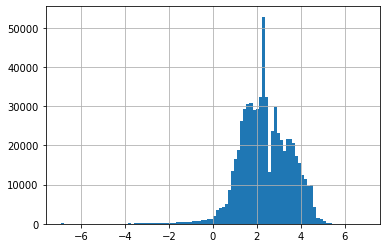

In [147]:
(np.log(data['Size'].astype(float))).hist(bins=100)

In [148]:
data['log_size'] = np.log(data['Size'].astype(float))

## 'Minimum Android'

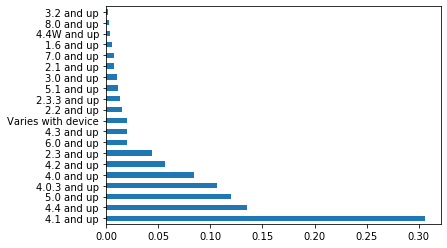

In [153]:
data['Minimum Android'].value_counts(normalize=True)[:20].plot.barh()

In [155]:
android_version_frequency_map = data['Minimum Android'].value_counts(normalize=True)

In [158]:
data['Minimum Android'] = data['Minimum Android'].map(android_version_frequency_map)

In [163]:
data.rename(columns={'Minimum Android':"android_version_frequency"}, inplace=True)

## 'Developer Id'

In [161]:
data['Developer Id'].value_counts()[:20]

Subsplash Inc                                       392
Amino Apps                                          316
+HOME by Ateam                                      231
AllDict                                             190
wsmrApps                                            190
Klays-Development                                   185
ZT.art                                              184
Weather Widget Theme Dev Team                       175
HistoryofTheWorld                                   170
Tapps Games                                         170
Simya Solutions Ltd.                                170
Modux Apps                                          167
Big Fish Games                                      163
MobiSystems                                         154
Next Tech Games Studios - Paint by Numbers Books    152
Google LLC                                          151
Lingua Apps                                         150
Magzter Inc.                                    

In [162]:
developer_frequency_map = data['Developer Id'].value_counts(normalize=True)
data['developer_id_frequency'] = data['Developer Id'].map(developer_frequency_map)

## 'Released', 'Last Updated'

In [168]:
data['Released'] = pd.to_datetime(data['Released'])
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [175]:
scrapping_date = max(data['Released'])

In [179]:
data['days_since_release'] = (scrapping_date - data['Released']).dt.days

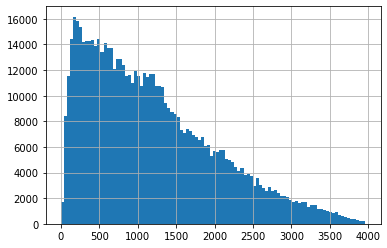

In [182]:
data['days_since_release'].hist(bins=100)

In [183]:
data['days_since_last_update'] = (scrapping_date - data['Last Updated']).dt.days

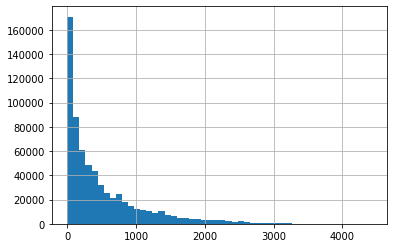

In [187]:
(data['days_since_last_update']).hist(bins=50)

## 'Content Rating'

In [189]:
data['Content Rating'].value_counts()

Everyone           564057
Teen                61690
Mature 17+          20030
Everyone 10+        13064
Unrated                57
Adults only 18+        36
Name: Content Rating, dtype: int64

In [192]:
data.groupby('Content Rating')['Rating'].median()

Content Rating
Adults only 18+    4.3
Everyone           4.2
Everyone 10+       4.1
Mature 17+         4.1
Teen               4.2
Unrated            3.9
Name: Rating, dtype: float64

In [193]:
data = pd.get_dummies(data, columns=['Content Rating'], prefix='content_rating')

## 'Privacy Policy'

In [195]:
data['Privacy Policy'].isnull().sum()

82986

In [196]:
data['no_privacy_policy'] = data['Privacy Policy'].isnull()

In [197]:
data.groupby('no_privacy_policy')['Rating'].mean()

no_privacy_policy
False    4.061183
True     4.117032
Name: Rating, dtype: float64

## 'Ad Supported'

In [200]:
data['Ad Supported'].value_counts()

True     452008
False    206926
Name: Ad Supported, dtype: int64

## 'In App Purchases'

In [202]:
data['In App Purchases'].value_counts()

False    555507
True     103427
Name: In App Purchases, dtype: int64

## 'Editors Choice'

In [204]:
data['Editors Choice'].value_counts()

False    658186
True        748
Name: Editors Choice, dtype: int64

In [220]:
data_clean = data.drop(columns=to_drop)

In [221]:
data_clean

,Rating,Free,Price,android_version_frequency,Ad Supported,In App Purchases,Editors Choice,app_name_length,category_Action,category_Adventure,...,developer_id_frequency,days_since_release,days_since_last_update,content_rating_Adults only 18+,content_rating_Everyone,content_rating_Everyone 10+,content_rating_Mature 17+,content_rating_Teen,content_rating_Unrated,no_privacy_policy
0,3.6,True,0.0,0.043868,False,False,False,22,0,0,...,0.000002,2670.0,1293,0,1,0,0,0,0,False
1,4.3,True,0.0,0.011810,True,True,False,29,0,0,...,0.000006,868.0,7,0,0,1,0,0,0,False
2,4.2,True,0.0,0.305707,True,False,False,6,0,0,...,0.000005,1732.0,43,0,1,0,0,0,0,False
3,4.2,True,0.0,0.135412,True,True,False,50,0,0,...,0.000234,3269.0,10,0,1,0,0,0,0,False
4,4.2,True,0.0,0.119710,False,False,False,16,0,0,...,0.000003,1531.0,11,0,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118110,3.7,True,0.0,0.010834,True,False,False,18,0,0,...,0.000002,2547.0,1166,0,1,0,0,0,0,False
1118111,3.7,True,0.0,0.106089,True,False,False,8,0,0,...,0.000005,1421.0,1338,0,1,0,0,0,0,True
1118119,4.2,True,0.0,0.305707,False,False,False,20,0,0,...,0.000003,1394.0,780,0,1,0,0,0,0,False
1118122,4.6,True,0.0,0.305707,False,False,False,15,0,0,...,0.000005,1088.0,1086,0,1,0,0,0,0,False


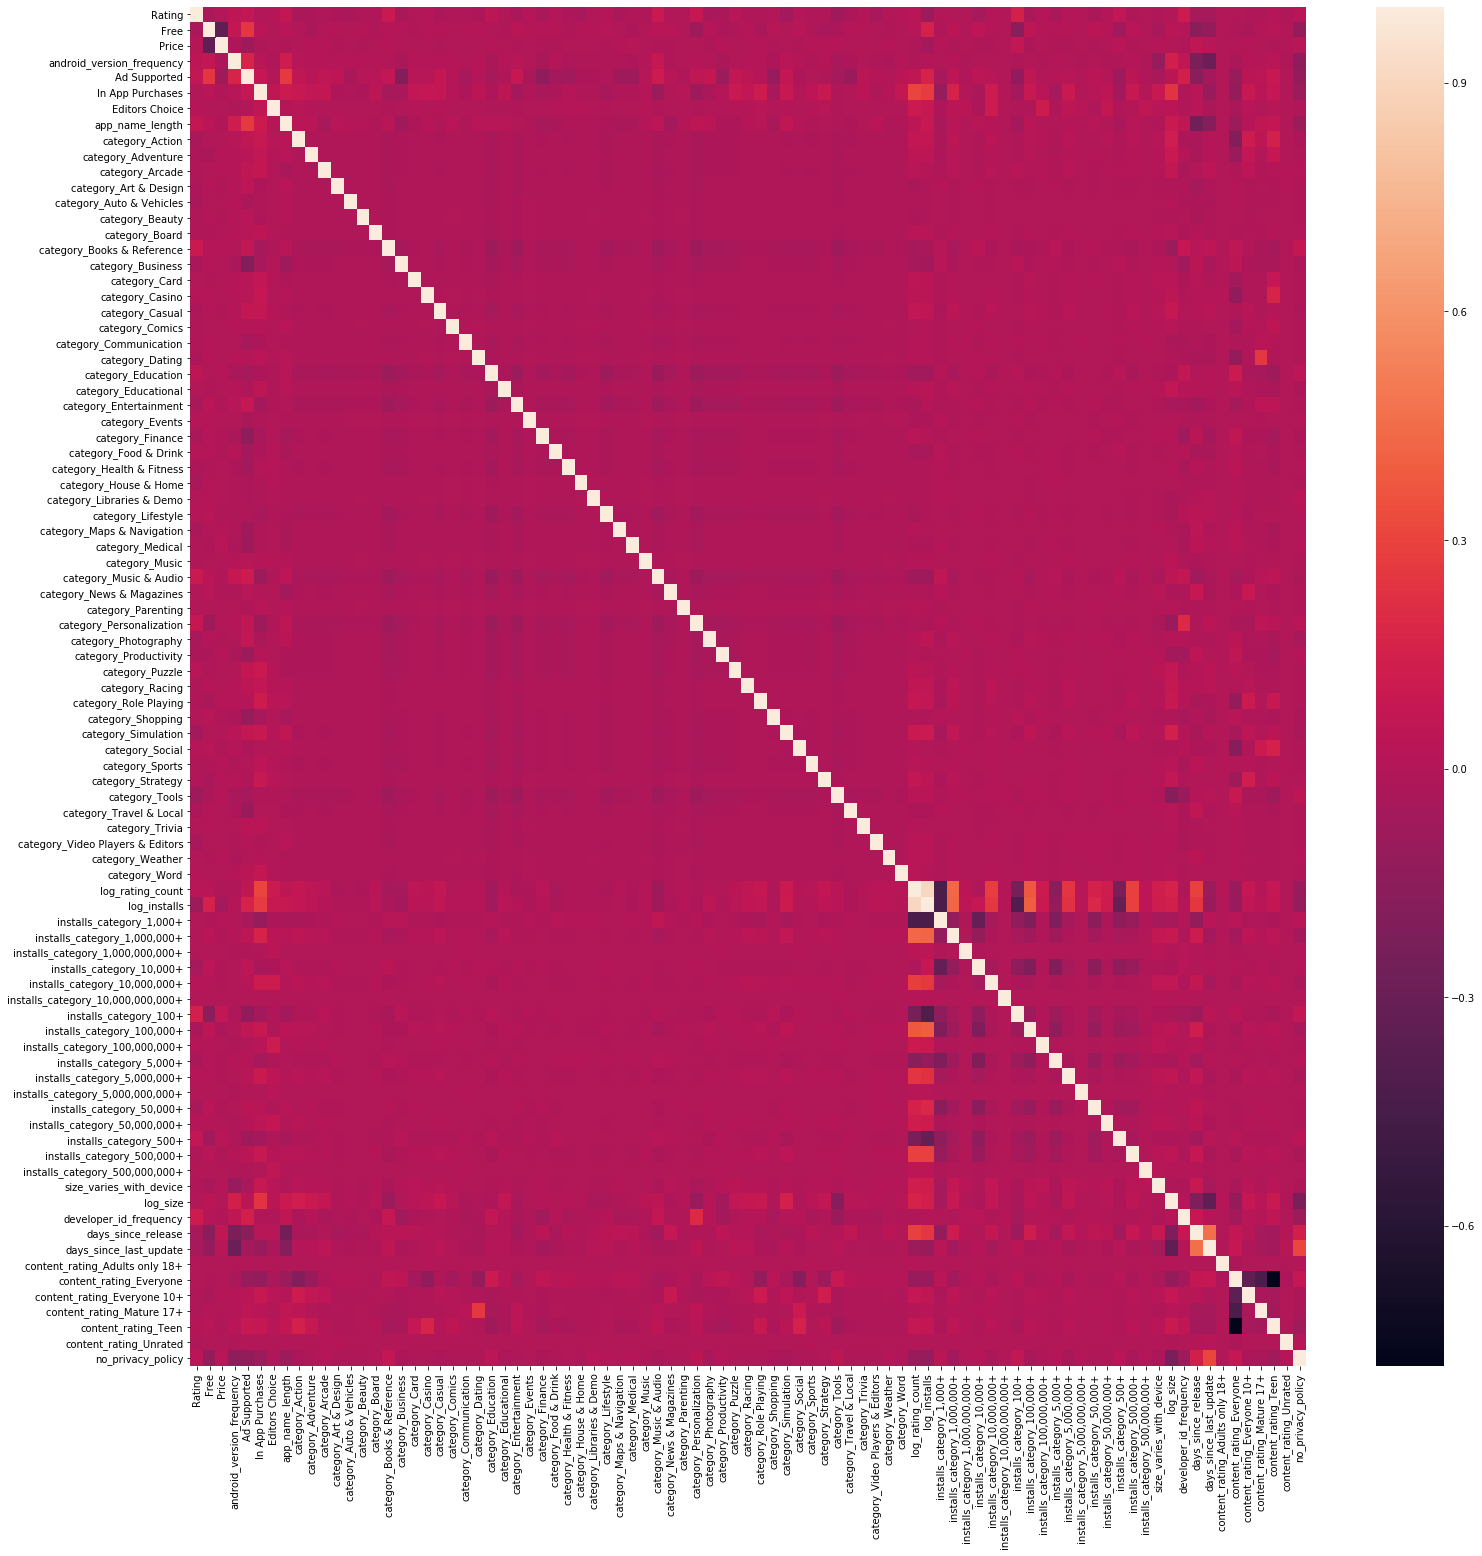

In [213]:
plt.figure(figsize=(25, 25))
sns.heatmap(data_clean.corr())
plt.show()

## Machine Learning

In [231]:
import random
##### Random seed given
random.seed(42)

In [248]:
data_clean.dropna(inplace=True)

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_clean.drop(['Rating'], axis=1), 
    data_clean['Rating'], 
    test_size=0.3
)

In [252]:
X_train.shape, X_test.shape

((460112, 86), (197192, 86))

## Scaling

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [254]:
continuous_vars = [
    'Price', 
    'app_name_length', 
    'log_rating_count',
    'log_installs',
    'log_size',
    'days_since_release',
    'days_since_last_update'
]

In [255]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_vars] = scaler.fit_transform(X_train_scaled[continuous_vars])
X_test_scaled[continuous_vars] = scaler.transform(X_test_scaled[continuous_vars])

## Baseline

In [256]:
from sklearn import metrics  # подгружаем метрики
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats

measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


In [257]:
median_train = y_train.median()

In [258]:
y_test_baseline = np.array([median_train]*len(y_test))

In [260]:
measured_metrics["baseline"] = dataframe_metrics(y_test, y_test_baseline)
measured_metrics

,error_type,baseline
0,MAE,0.475742
1,RMSE,0.653246
2,R2,-0.041048
3,MAPE,14.226404


## Linear Regression

In [261]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [263]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

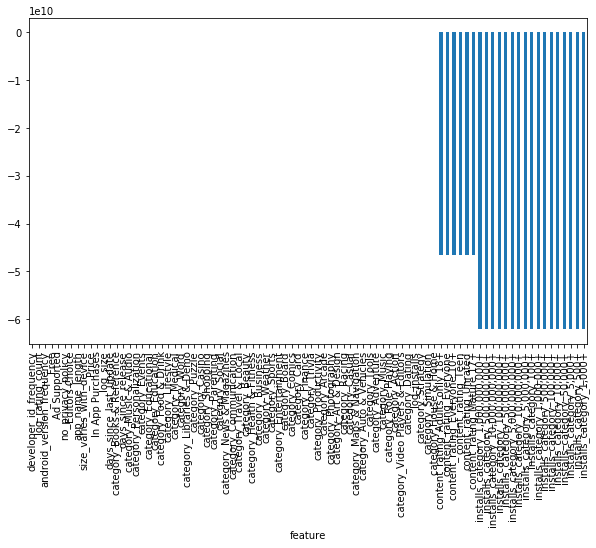

In [264]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": lin_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

## RidgeCV

In [267]:
ridge_cv = RidgeCV()

ridge_cv.fit(X_train_scaled, y_train)

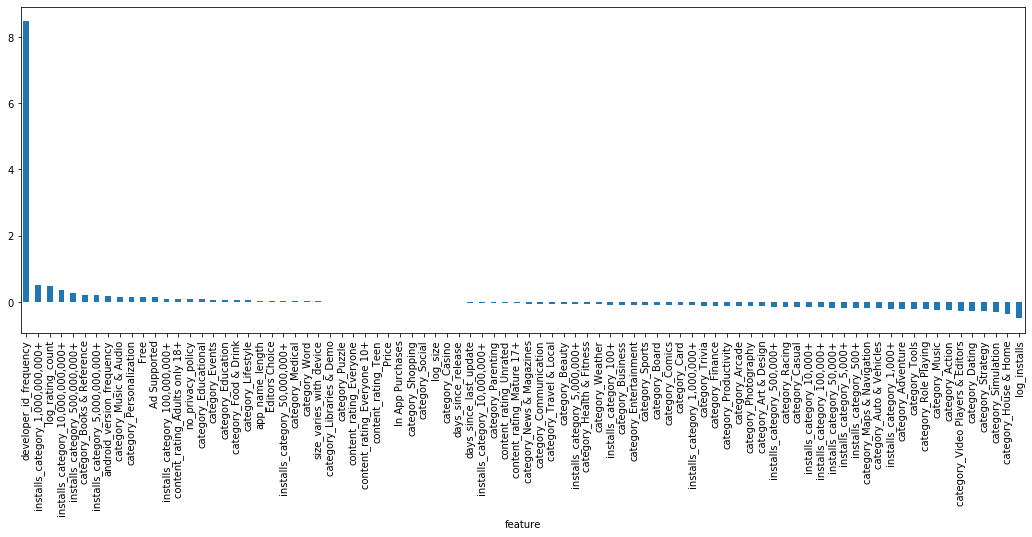

In [268]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": ridge_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(18, 6));

In [269]:
predictions = ridge_cv.predict(X_test_scaled)

In [270]:
measured_metrics["ridge_cv"] = dataframe_metrics(y_test, predictions)
measured_metrics

,error_type,baseline,ridge_cv
0,MAE,0.475742,0.435329
1,RMSE,0.653246,0.587810
2,R2,-0.041048,0.157071
3,MAPE,14.226404,12.661212


## Lasso 

In [271]:
lasso_cv = LassoCV()

lasso_cv.fit(X_train_scaled, y_train)

LassoCV()

,error_type,baseline,ridge_cv,lasso_cv
0,MAE,0.475742,0.435329,0.435406
1,RMSE,0.653246,0.587810,0.587886
2,R2,-0.041048,0.157071,0.156853
3,MAPE,14.226404,12.661212,12.663752


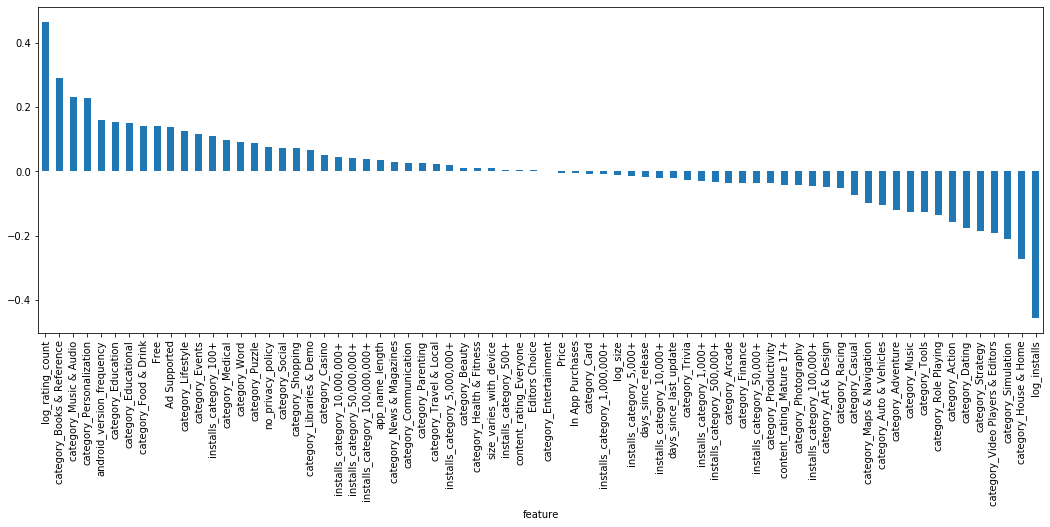

In [273]:
featureImportance = pd.DataFrame({"feature": X_train.columns[lasso_cv.coef_!=0], 
                                  "importance": lasso_cv.coef_[lasso_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(18, 6));

measured_metrics["lasso_cv"] = dataframe_metrics(y_test, lasso_cv.predict(X_test_scaled))
measured_metrics

## RandomForest

In [274]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
rf_reg = RandomForestRegressor(n_jobs=-1)
rf_reg.fit(X_train, y_train)

measured_metrics["rf_reg"] = dataframe_metrics(y_test, rf_reg.predict(X_test))
measured_metrics

,error_type,baseline,ridge_cv,lasso_cv,rf_reg
0,MAE,0.475742,0.435329,0.435406,0.410415
1,RMSE,0.653246,0.587810,0.587886,0.561183
2,R2,-0.041048,0.157071,0.156853,0.231707
3,MAPE,14.226404,12.661212,12.663752,11.847817
